# **PREDICTIVE CUSTOMER CHURN ANALYSIS – TELECOMMUNICATION**


**1. Problem Statement:**

Construct a churn prediction system by analyzing customer behavior in telecom services—looking at billing history, contract type, service usage, and support interactions. We will perform Exploratory Data Analysis (EDA) , data cleaning and machine learning ( preprocessing the model , training the model and performing logistic regression).


**2. Loading Dataset and Required Libraries**


In [467]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score
)

sns.set(style="whitegrid")


In [469]:
# Load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**3. Data Cleaning**


In [472]:
# Check dataset shape and data types
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [474]:
# Count missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)


Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [476]:
# 🧹 Step 3: Data Cleaning
# Drop non-useful ID column
df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric (some values are blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# Encode target column 'Churn' (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [478]:
df.loc[:, 'TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [480]:
# Check missing values again
print("Missing after conversion:\n", df.isnull().sum())


Missing after conversion:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [482]:
# Drop rows where TotalCharges is missing
df = df.dropna(subset=['TotalCharges'])
print("Shape after cleaning:", df.shape)


Shape after cleaning: (7043, 20)


**4. Exploratory Data Analysis (EDA)**


In [485]:
# Summary stats for numerical columns
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [487]:
# Churn distribution
print(df['Churn'].value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64


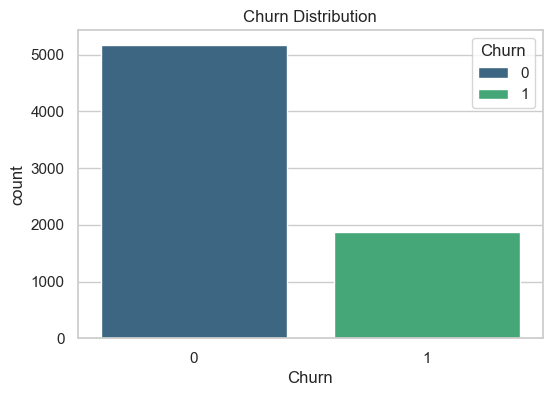

In [489]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, hue ='Churn',palette='viridis')
plt.title('Churn Distribution')
plt.show()


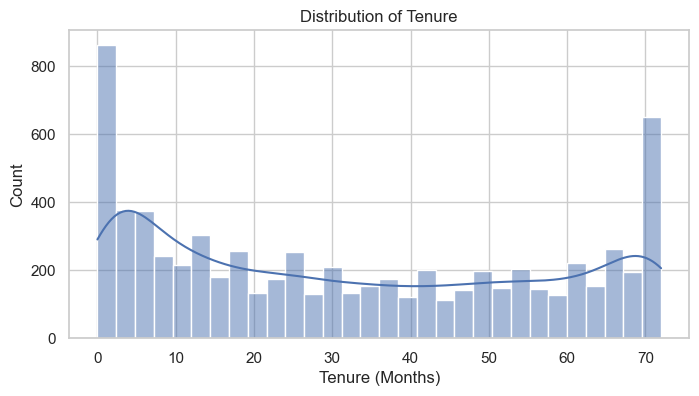

In [491]:
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.show()


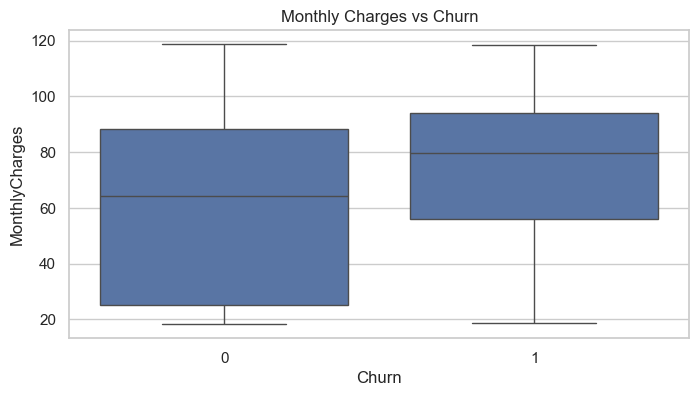

In [493]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


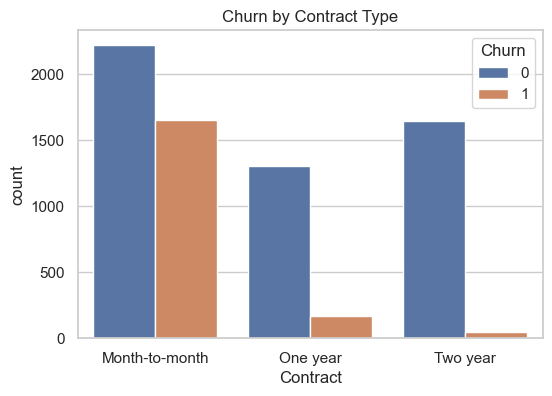

In [495]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()


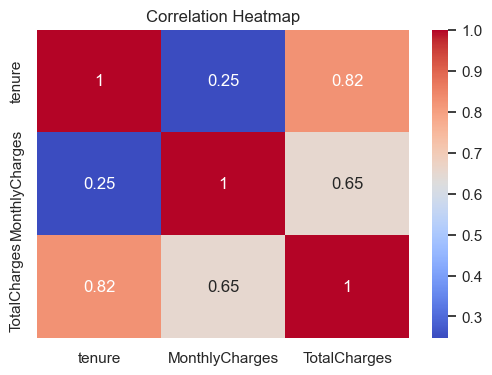

In [497]:
plt.figure(figsize=(6,4))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [499]:
# Unique values summary for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")


gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values


**5. MACHINE LEARNING**

**-Preprocessing Model**

In [503]:
# Label Encode Binary Categorical Columns
binary_cols = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'PaperlessBilling'
]

for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])



In [505]:
# One-Hot Encode Multi-Class Categorical Columns
multi_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)



In [507]:
#Define Feature Matrix and Target Variable
X = df.drop('Churn', axis=1).values
y = df['Churn'].values


In [509]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)



In [511]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**-Training Model**

In [514]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y
)



In [516]:
# Scale the Features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**-Logistic Regression**

In [519]:
# Train Logistic Regression Model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [520]:
# Predict on Test Set
y_pred = classifier.predict(X_test)


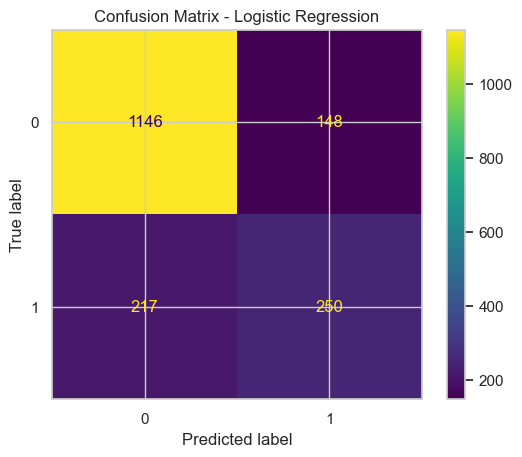

In [523]:
# Evaluate Performance
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [525]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("📊 Model Evaluation:")
print("Accuracy :", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall   :", round(recall, 3))

📊 Model Evaluation:
Accuracy : 0.793
Precision: 0.628
Recall   : 0.535


In [527]:
X_set, y_set = X_train, y_train

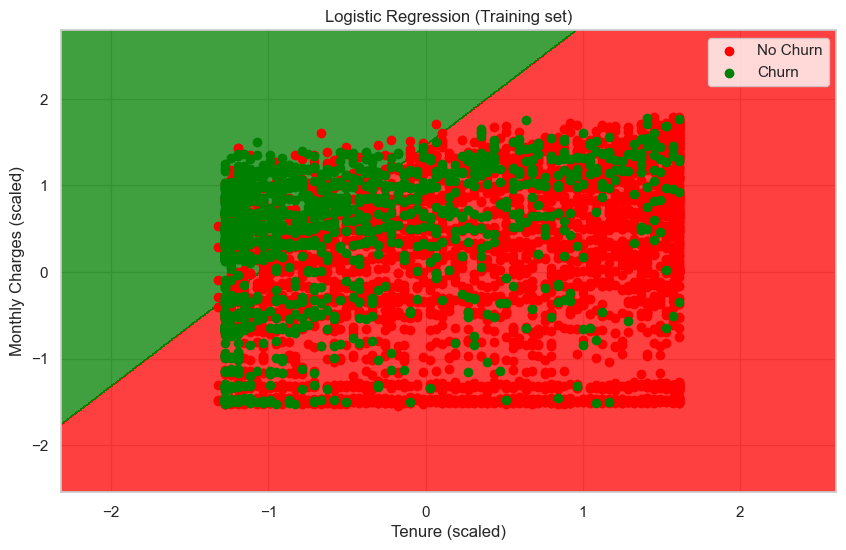

In [531]:
# 4️⃣ Train classifier on 2D feature space
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
# Visualize decision boundary
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
)

plt.figure(figsize=(10,6))
plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        color = ListedColormap(('red', 'green'))(i),
        label = 'Churn' if j == 1 else 'No Churn'
    )

plt.title('Logistic Regression (Training set)')
plt.xlabel('Tenure (scaled)')
plt.ylabel('Monthly Charges (scaled)')
plt.legend()
plt.grid(True)
plt.show()


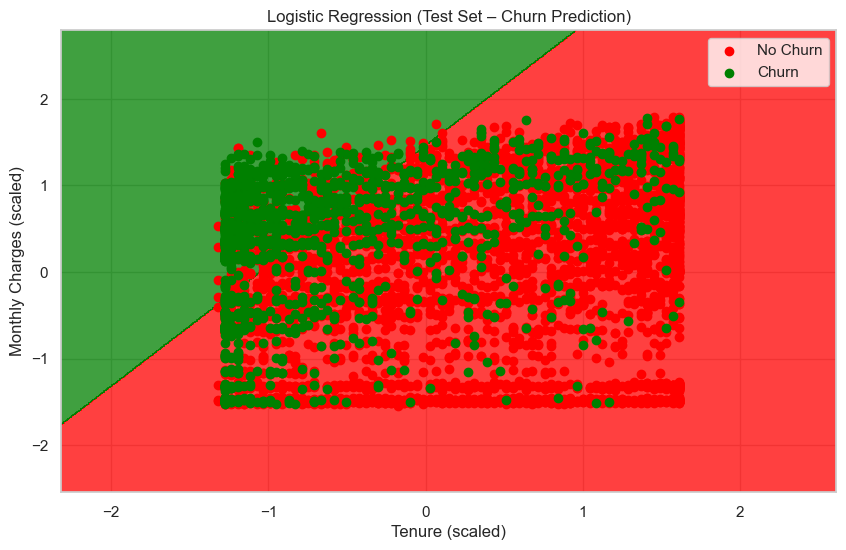

In [533]:
# Create meshgrid for contour plotting
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=ListedColormap(('red', 'green'))(i),
        label='Churn' if j == 1 else 'No Churn'
    )

# Titles and labels
plt.title('Logistic Regression (Test Set – Churn Prediction)')
plt.xlabel('Tenure (scaled)')
plt.ylabel('Monthly Charges (scaled)')
plt.legend()
plt.grid(True)
plt.show()

**Support Vector Machines**

**SVM is a supervised learning algorithm used for classification and regression.
It finds the best hyperplane that separates data points of different classes.
The goal is to maximize the margin between classes.
Data points closest to the hyperplane are called support vectors.
Works well in high-dimensional spaces.**

Confusion Matrix:
 [[917 124]
 [206 162]]


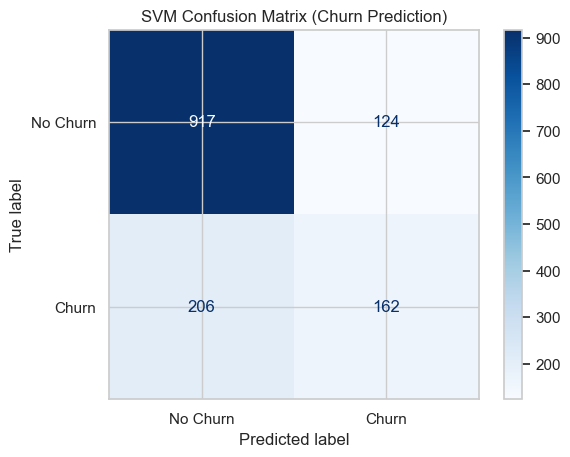

In [537]:
# Create and train the classifier
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Predicting on Test Set
y_pred = classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title('SVM Confusion Matrix (Churn Prediction)')
plt.show()

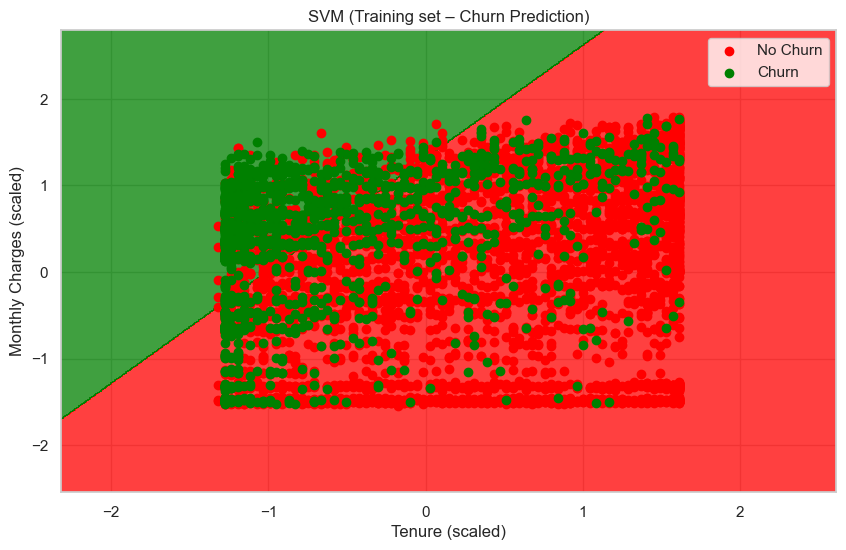

In [539]:
# Create meshgrid for 2D decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot actual data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
            color=ListedColormap(('red', 'green'))(i), label='Churn' if j == 1 else 'No Churn')

plt.title('SVM (Training set – Churn Prediction)')
plt.xlabel('Tenure (scaled)')
plt.ylabel('Monthly Charges (scaled)')
plt.legend()
plt.grid(True)
plt.show()

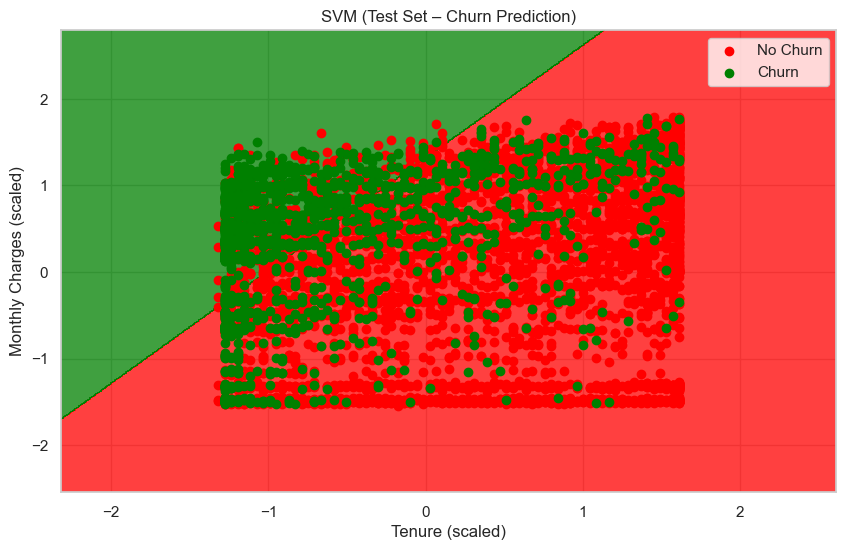

In [540]:
# Create a meshgrid for plotting decision regions
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)



plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot actual data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
            color=ListedColormap(('red', 'green'))(i), label='Churn' if j == 1 else 'No Churn')
plt.title('SVM (Test Set – Churn Prediction)')
plt.xlabel('Tenure (scaled)')
plt.ylabel('Monthly Charges (scaled)')
plt.legend()
plt.grid(True)
plt.show()

**Unsupervised Learning**

**K-Means Clustering Algorithm**


**K-Means is an unsupervised learning algorithm used for clustering data.
It divides the data into K distinct clusters based on similarity**

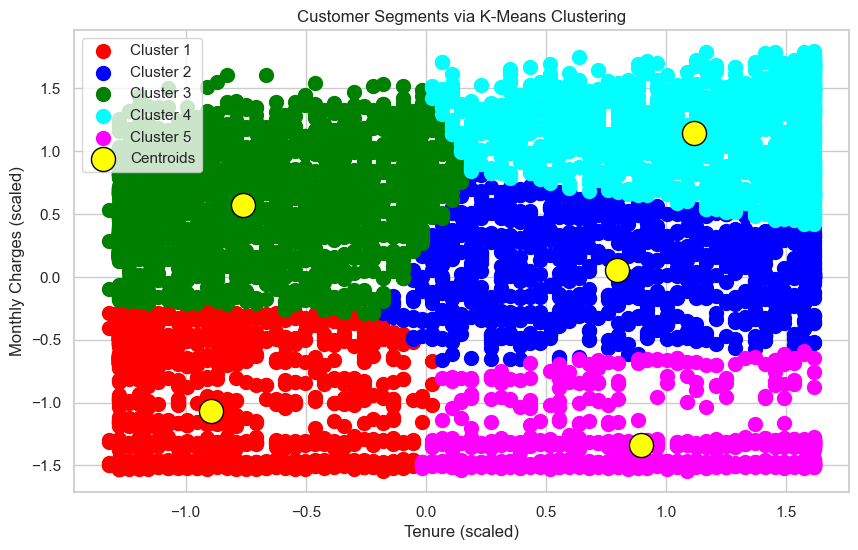

In [544]:
X_scaled = sc.fit_transform(df[['tenure', 'MonthlyCharges']].values)

# Step 2: Fit K-Means with 5 clusters (you can change this number based on Elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 3: Visualize the clusters
plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', edgecolor='black')

plt.title('Customer Segments via K-Means Clustering')
plt.xlabel('Tenure (scaled)')
plt.ylabel('Monthly Charges (scaled)')
plt.legend()
plt.grid(True)
plt.show()

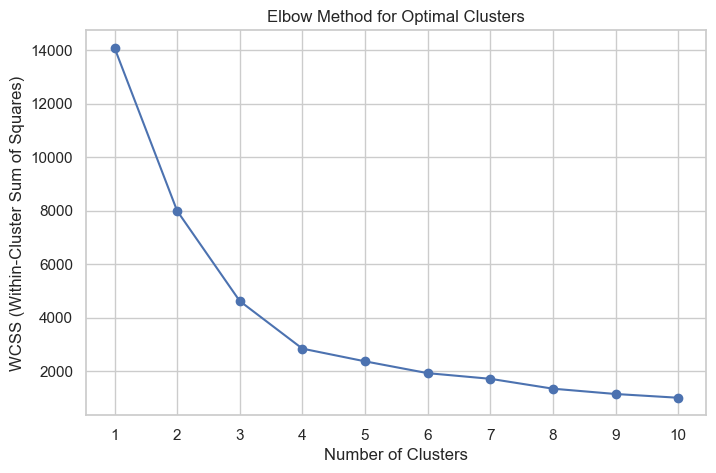

In [545]:
# Select and scale features (if not already scaled)
X = df[['tenure', 'MonthlyCharges']].values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Elbow Method to find optimal number of clusters
wcss = []  # WCSS = Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()